In [1]:
import pandas as pd
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns 

In [2]:
train = pd.read_csv("./bike_train.csv", parse_dates=['datetime'])
test = pd.read_csv("./bike_test.csv", parse_dates=['datetime'])

In [51]:
print(train.shape)
print(test.shape)

(10886, 19)
(6493, 16)


False

In [4]:
print(train.info())
print() # 한줄 공백
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 no

In [5]:
print(train.columns)
print()
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [6]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
train.tail()   # 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2


In [24]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,20,4,0,0,3


In [25]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,minute,second,dayofweek
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,12,31,22,0,0,0
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,12,31,23,0,0,0


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


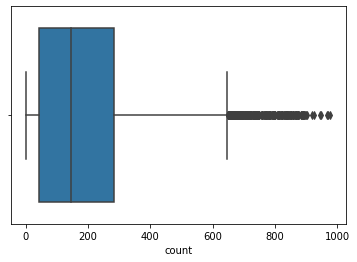

In [8]:
print(train['count'].describe())
sns.boxplot(train['count'])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

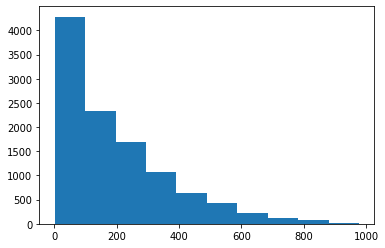

In [9]:
plt.hist(train['count'])

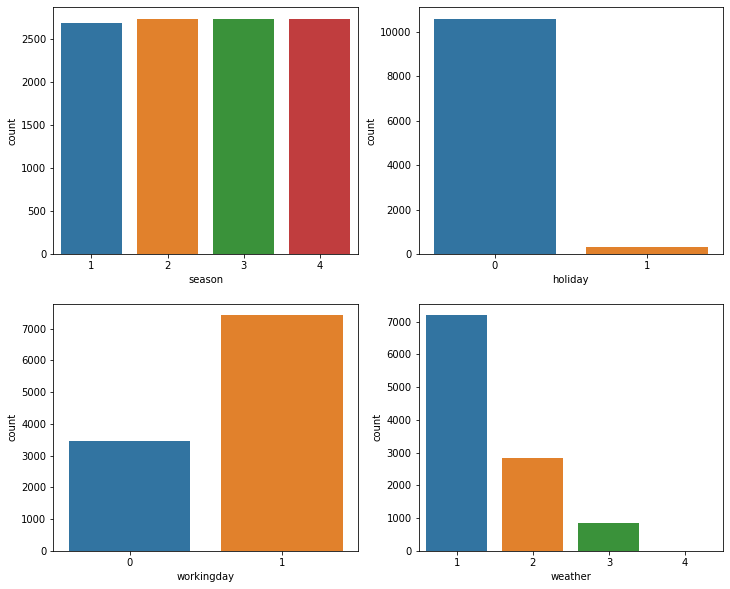

In [10]:
col_names = [ 'season', 'holiday', 'workingday', 'weather' ]
i = 0
plt.figure(figsize=(12,10)) # 전체 그래프의 크기 지정 (가로, 세로)
for name in col_names: # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
 i = i + 1 # 숫자를 1씩 증가.
 plt.subplot(2,2,i) # 2행 2열에 i번째 그래프 선택
 sns.countplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.
# 주피터에서 아래 행이 필요없지만,
# 다른곳(editor, pycharm)에서는(*.py 파일) plt.show()이걸 실행시켜야 한다.
plt.show() 

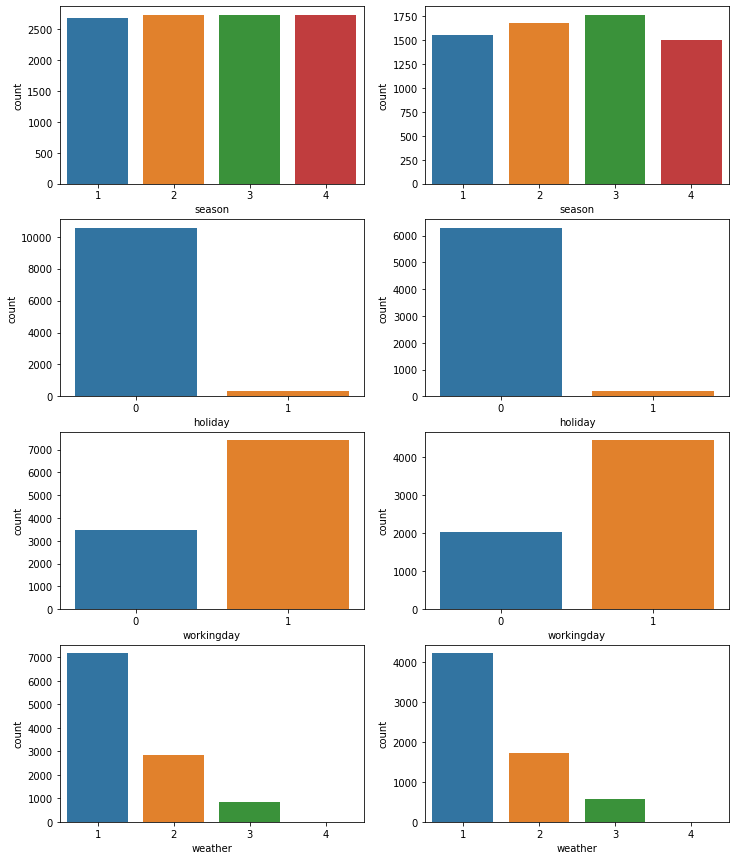

In [11]:
col_names = [ 'season', 'holiday', 'workingday', 'weather' ]
i = 0
plt.figure(figsize=(12,15)) # 전체 그래프의 크기 지정 (가로, 세로)
for name in col_names: # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
 i = i + 1 # 숫자를 1씩 증가.
 plt.subplot(4,2,i*2-1) # 2행 2열에 i번째 그래프 선택
 sns.countplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.
 plt.subplot(4,2,i*2) # 2행 2열에 i번째 그래프 선택
 sns.countplot(name, data=test) # i번째 그래프에 sns.countplot를 그리겠다.
# 주피터에서 아래 행이 필요없지만,
# 다른곳(editor, pycharm)에서는(*.py 파일) plt.show()이걸 실행시켜야 한다.
plt.show()

In [12]:
### temp, atemp, humidity, windspeed
num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

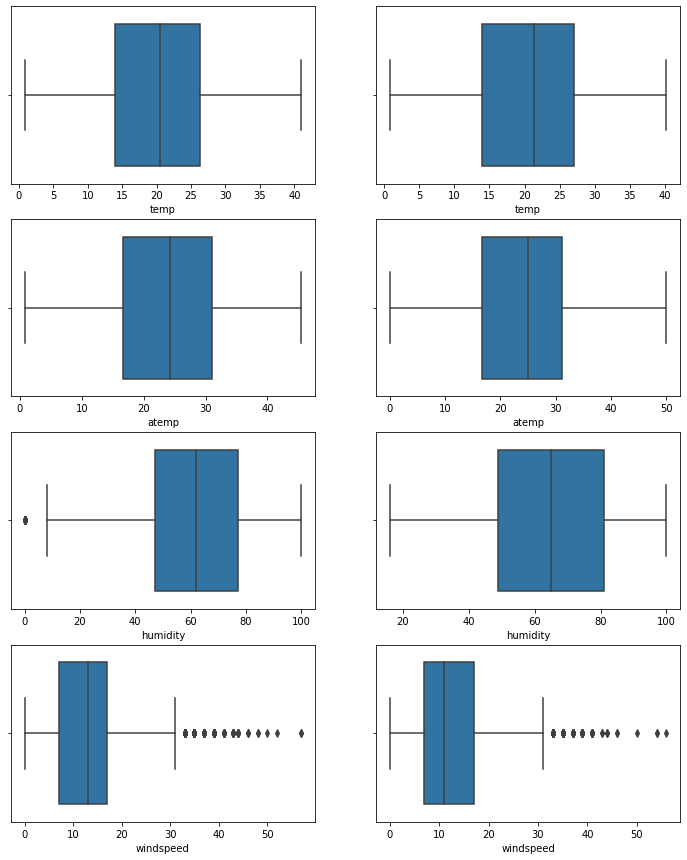

In [13]:
i = 0
plt.figure(figsize=(12,15)) # 전체 그래프의 크기 지정 (가로, 세로)
for name in num_names: # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
 i = i + 1 # 숫자를 1씩 증가.
 plt.subplot(4,2,i*2-1) # 2행 2열에 i번째 그래프 선택
 sns.boxplot(name, data=train) # i번째 그래프에 sns.countplot를 그리겠다.
 plt.subplot(4,2,i*2) # 2행 2열에 i번째 그래프 선택
 sns.boxplot(name, data=test) # i번째 그래프에 sns.countplot를 그리겠다.

plt.show() 

In [14]:
new_tr = train # 데이터 백업
new_test = test
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [26]:
new_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 1.6 MB


In [27]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
month         6493 non-null int64
day           6493 non-null int64
hour          6493 non-null int64
minute        6493 non-null int64
second        6493 non-null int64
dayofweek     6493 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 761.0 KB


In [16]:
new_tr['datetime'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [17]:
new_test['datetime'].dt.day.head()

0    20
1    20
2    20
3    20
4    20
Name: datetime, dtype: int64

In [28]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [29]:
new_test['year'] = new_test['datetime'].dt.year
new_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,minute,second,dayofweek,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,20,0,0,0,3,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,0,0,3,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,2,0,0,3,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,20,3,0,0,3,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,20,4,0,0,3,2011


In [31]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr[ ['datetime', 'year', 'month', 'day', 'hour', 'dayofweek'] ].head()

,datetime,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5


In [32]:
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test[ ['datetime', 'year', 'month', 'day', 'hour', 'dayofweek'] ].head()

,datetime,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,3
1,2011-01-20 01:00:00,2011,1,20,1,3
2,2011-01-20 02:00:00,2011,1,20,2,3
3,2011-01-20 03:00:00,2011,1,20,3,3
4,2011-01-20 04:00:00,2011,1,20,4,3


In [33]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

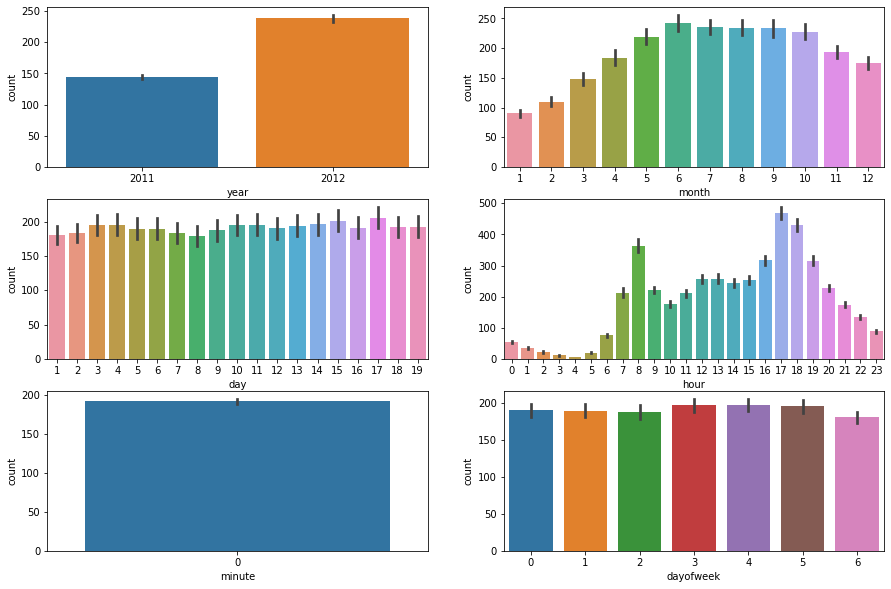

In [34]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'dayofweek']
i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
 i = i + 1
 plt.subplot(3,2,i)
 sns.barplot(x=name, y='count', data=new_tr)

plt.show()

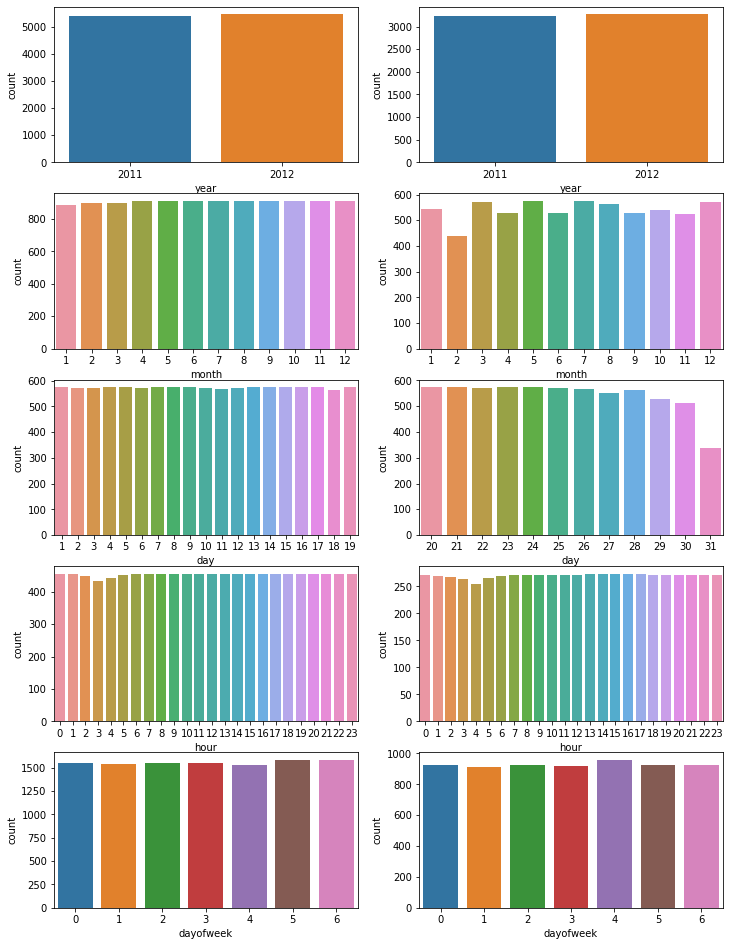

In [35]:
col_names = ['year','month','day','hour','dayofweek']
i = 0
plt.figure(figsize=(12,20)) ##전체 그래프 크기 지정
for name in col_names: ## 컬럼명으로 반복
 i = i+1
 plt.subplot(6,2,i) ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
 sns.countplot(name, data = new_tr)

 i = i+1
 plt.subplot(6,2,i) ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
 sns.countplot(name, data = new_test)

plt.show()

In [36]:
new_tr = new_tr.drop(['minute', 'second'], axis=1)
new_test = new_test.drop(['minute', 'second'], axis=1)

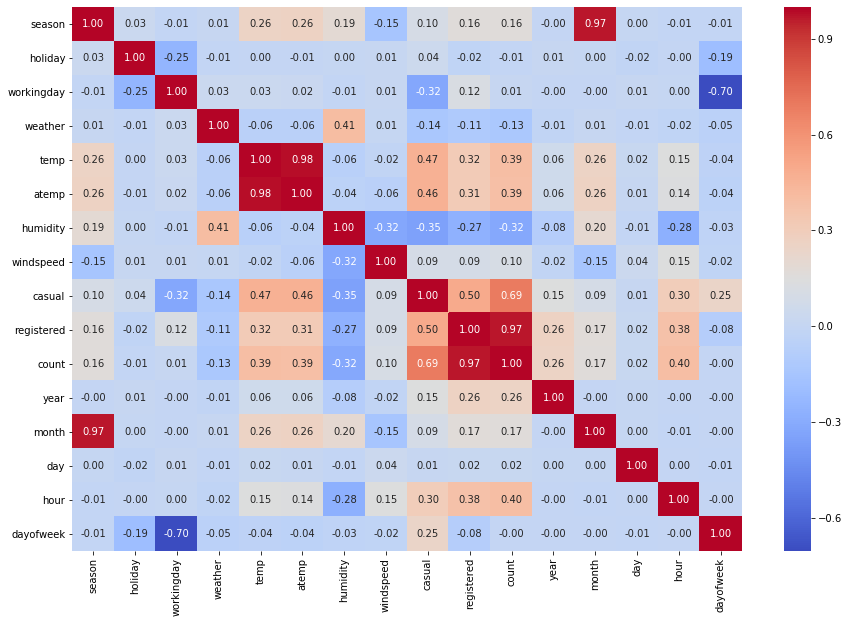

In [37]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

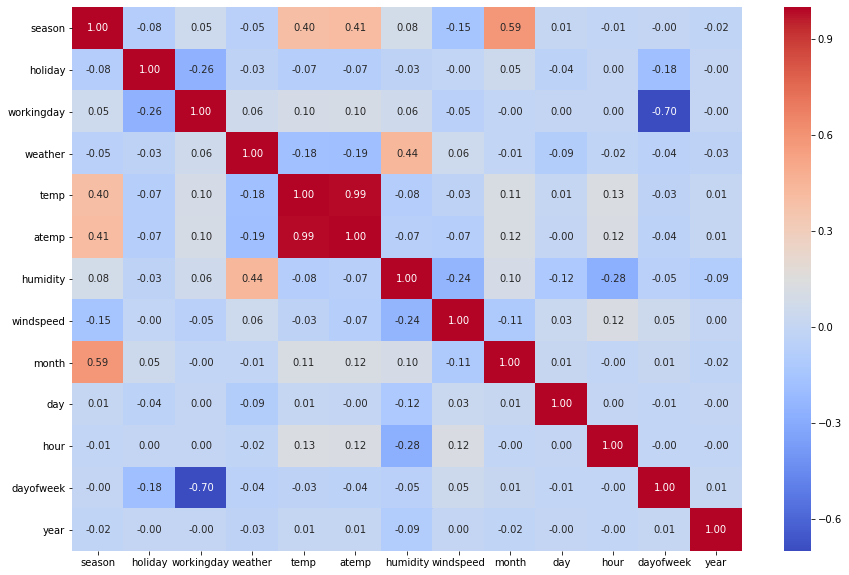

In [38]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_test.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [39]:
# model 만들기

In [40]:
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [41]:
f_names = ['temp', 'atemp', 'hour', 'dayofweek','year' ]
X_train = new_tr[f_names] # 학습용 입력 데이터
X_test = new_test[f_names] # 예측을 위한 입력 데이터


In [42]:
label_name = 'count' # 렌탈 대수 (통계 :종속변수)
y_train = new_tr[label_name] # 렌탈 대수 변수 값 선택

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
# 모델 생성, 학습, 예측
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test) # 예측(새로운 데이터로)


array([-36.63228947, -22.88902469, -13.61317861, ..., 245.41450741,
       256.17621301, 265.45205909])

In [45]:
model.coef_


array([ 5.53159603,  1.96802586,  9.27584608,  1.13180308, 87.66787928])

In [46]:
model.intercept_


-176421.46636083713

In [47]:
# 답지 가져오고 답지 쓰기

In [48]:
pred = model.predict(X_test) # 예측
sub = pd.read_csv("./sampleSubmission.csv") # 답지 가져오기
sub['count'] = pred 

In [50]:
sub.to_csv("./firstsubmission.csv", index=False)